In [5]:
import pandas as pd
malData=pd.read_csv(r'C:\Users\Muskan Daruka\Desktop\MalwareData.csv.gz',sep='|')
legit=malData[0:41323].drop(["legitimate"],axis=1)
mal=malData[41323::].drop(["legitimate"],axis=1)
print("The shape of the legit dataset is : %s samples, %s features"%(legit.shape[0],legit.shape[1]))
print("The shape of the malware dataset is: %s samples, %s features"%(mal.shape[0],mal.shape[1]))

The shape of the legit dataset is : 41323 samples, 56 features
The shape of the malware dataset is: 96724 samples, 56 features


In [6]:
print(malData.columns)

Index(['Name', 'md5', 'Machine', 'SizeOfOptionalHeader', 'Characteristics',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'SectionsNb',
       'SectionsMeanEntropy', 'SectionsMinEntropy', 'SectionsMaxEntropy',
       'SectionsMeanRawsize', 'SectionsMinRawsize', 'SectionMaxRawsize',
       'SectionsMeanVirtualsize', 'SectionsMinVirtualsize',
       'SectionMaxVirtualsize', 'ImportsNbDLL', 'ImportsNb',
       'Impor

In [7]:
print(malData.head(5))

           Name                               md5  Machine  \
0   memtest.exe  631ea355665f28d4707448e442fbf5b8      332   
1       ose.exe  9d10f99a6712e28f8acd5641e3a7ea6b      332   
2     setup.exe  4d92f518527353c0db88a70fddcfd390      332   
3      DW20.EXE  a41e524f8d45f0074fd07805ff0c9b12      332   
4  dwtrig20.exe  c87e561258f2f8650cef999bf643a731      332   

   SizeOfOptionalHeader  Characteristics  MajorLinkerVersion  \
0                   224              258                   9   
1                   224             3330                   9   
2                   224             3330                   9   
3                   224              258                   9   
4                   224              258                   9   

   MinorLinkerVersion  SizeOfCode  SizeOfInitializedData  \
0                   0      361984                 115712   
1                   0      130560                  19968   
2                   0      517120                 621568   
3 

In [9]:
pd.set_option("display.max_columns",None)

In [10]:
print(malData.head(5))

           Name                               md5  Machine  \
0   memtest.exe  631ea355665f28d4707448e442fbf5b8      332   
1       ose.exe  9d10f99a6712e28f8acd5641e3a7ea6b      332   
2     setup.exe  4d92f518527353c0db88a70fddcfd390      332   
3      DW20.EXE  a41e524f8d45f0074fd07805ff0c9b12      332   
4  dwtrig20.exe  c87e561258f2f8650cef999bf643a731      332   

   SizeOfOptionalHeader  Characteristics  MajorLinkerVersion  \
0                   224              258                   9   
1                   224             3330                   9   
2                   224             3330                   9   
3                   224              258                   9   
4                   224              258                   9   

   MinorLinkerVersion  SizeOfCode  SizeOfInitializedData  \
0                   0      361984                 115712   
1                   0      130560                  19968   
2                   0      517120                 621568   
3 

In [11]:
print(legit.take([1]))

      Name                               md5  Machine  SizeOfOptionalHeader  \
1  ose.exe  9d10f99a6712e28f8acd5641e3a7ea6b      332                   224   

   Characteristics  MajorLinkerVersion  MinorLinkerVersion  SizeOfCode  \
1             3330                   9                   0      130560   

   SizeOfInitializedData  SizeOfUninitializedData  AddressOfEntryPoint  \
1                  19968                        0                81778   

   BaseOfCode  BaseOfData    ImageBase  SectionAlignment  FileAlignment  \
1        4096      143360  771751936.0              4096            512   

   MajorOperatingSystemVersion  MinorOperatingSystemVersion  \
1                            5                            1   

   MajorImageVersion  MinorImageVersion  MajorSubsystemVersion  \
1                  0                  0                      5   

   MinorSubsystemVersion  SizeOfImage  SizeOfHeaders  CheckSum  Subsystem  \
1                      1       159744           1024   

In [12]:
print(mal.take([1]))

                                              Name  \
41324  VirusShare_9bd57c8252948bd2fa651ad372bd4f13   

                                    md5  Machine  SizeOfOptionalHeader  \
41324  9bd57c8252948bd2fa651ad372bd4f13      332                   224   

       Characteristics  MajorLinkerVersion  MinorLinkerVersion  SizeOfCode  \
41324              271                   6                   0       24064   

       SizeOfInitializedData  SizeOfUninitializedData  AddressOfEntryPoint  \
41324                 164864                     1024                12538   

       BaseOfCode  BaseOfData  ImageBase  SectionAlignment  FileAlignment  \
41324        4096       28672  4194304.0              4096            512   

       MajorOperatingSystemVersion  MinorOperatingSystemVersion  \
41324                            4                            0   

       MajorImageVersion  MinorImageVersion  MajorSubsystemVersion  \
41324                  6                  0                      4  

In [27]:
import sklearn
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [28]:
data_in=malData.drop(['Name','md5','legitimate'],axis=1).values
labels=malData['legitimate'].values
extratrees=ExtraTreesClassifier().fit(data_in,labels)
select=SelectFromModel(extratrees,prefit=True)
data_in_new=select.transform(data_in)
print(data_in.shape,data_in_new.shape)

(138047, 54) (138047, 14)


In [29]:
import numpy as np
features=data_in_new.shape[1]
importances=extratrees.feature_importances_
indices=np.argsort(importances)[::-1]
for f in range(features):
    print("%d"%(f+1),malData.columns[2+indices[f]],importances[indices[f]])

1 DllCharacteristics 0.14173992378347625
2 Machine 0.10829671449174151
3 Characteristics 0.09780593037472529
4 SectionsMaxEntropy 0.066730072677555
5 VersionInformationSize 0.0662350767806889
6 ImageBase 0.060905767454075346
7 Subsystem 0.05694899797752667
8 MajorSubsystemVersion 0.05448270053033839
9 ResourcesMaxEntropy 0.048955801280193965
10 SizeOfOptionalHeader 0.042193101925319804
11 ResourcesMinEntropy 0.023698707279211927
12 SectionsMeanEntropy 0.022033267267174566
13 MajorOperatingSystemVersion 0.021991350192109925
14 SectionsMinEntropy 0.019301437171387933


In [35]:
from sklearn.ensemble import RandomForestClassifier
legit_train,legit_test,mal_train,mal_test=train_test_split(data_in_new,labels,test_size=0.2)
classif=RandomForestClassifier(n_estimators=50)

classif.fit(legit_train,mal_train)

RandomForestClassifier(n_estimators=50)

In [36]:
print("The score of the algorithm: ",classif.score(legit_test,mal_test)*100)

The score of the algorithm:  99.37341542919232


In [38]:
from sklearn.metrics import confusion_matrix
result=classif.predict(legit_test)
conf_mat=confusion_matrix(mal_test,result)

In [39]:
conf_mat.shape

(2, 2)

In [40]:
type(conf_mat)

numpy.ndarray

In [41]:
conf_mat

array([[19290,    79],
       [   94,  8147]], dtype=int64)

In [43]:
print("False positives: ",conf_mat[0][1]/sum(conf_mat[0])*100)
print("False negatives: ",conf_mat[1][0]/sum(conf_mat[1])*100)

False positives:  0.40786824306882136
False negatives:  1.1406382720543622


In [45]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost=GradientBoostingClassifier(n_estimators=50)
grad_boost.fit(legit_train,mal_train)

GradientBoostingClassifier(n_estimators=50)

In [46]:
print("The score of the Gradient Boosting Classifier is: ",grad_boost.score(legit_test,mal_test)*100)

The score of the Gradient Boosting Classifier is:  98.78304961970301


In [47]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier.fit(legit_train, mal_train)

KNeighborsClassifier(n_neighbors=3)

In [48]:
mal_pred = classifier.predict(legit_test)

In [50]:
print("The score of the knn is: ",classifier.score(legit_test,mal_test)*100)

The score of the knn is:  98.98949655921767


In [53]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

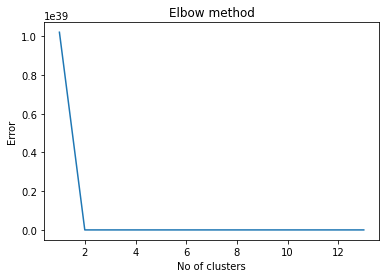

In [86]:
Error=[]
for i in range(1,14):
    kmeans=KMeans(n_clusters=i).fit(legit_train)
    kmeans.fit(legit_train)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1,14),Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [87]:
kmeans2=KMeans(n_clusters=2)
y_kmeans2=kmeans2.fit_predict(legit_train)
print(y_kmeans2)

[0 0 0 ... 0 0 0]


In [88]:
kmeans2.cluster_centers_

array([[3.32000000e+02, 2.24000000e+02, 8.45000000e+03, 2.68435456e+08,
        5.00000000e+00, 5.00000000e+00, 3.00000000e+00, 1.08800000e+03,
        3.66709496e+00, 1.57584549e+00, 5.75834442e+00, 2.25316420e+00,
        5.98548225e+00, 1.80000000e+01],
       [3.44040000e+04, 2.40000000e+02, 3.40000000e+01, 1.84467353e+19,
        6.00000000e+00, 6.00000000e+00, 3.00000000e+00, 0.00000000e+00,
        3.01210559e+00, 4.15426721e-01, 6.33985633e+00, 3.55582102e+00,
        3.55582102e+00, 1.60000000e+01]])

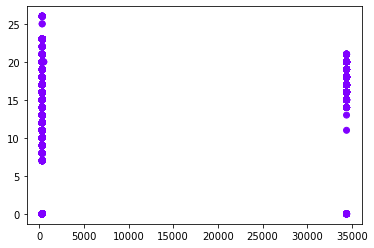

In [89]:
plt.scatter(legit_train[:,0],legit_train[:,13],c=y_kmeans2,cmap='rainbow')